In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.shape

(1599, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_so2', 'total_so2', 'density', 'ph', 'sulphates', 'etoh', 'quality']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity       1599 non-null float64
volatile_acidity    1599 non-null float64
citric_acid         1599 non-null float64
residual_sugar      1599 non-null float64
chlorides           1599 non-null float64
free_so2            1599 non-null float64
total_so2           1599 non-null float64
density             1599 non-null float64
ph                  1599 non-null float64
sulphates           1599 non-null float64
etoh                1599 non-null float64
quality             1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.fixed_acidity.value_counts(dropna=False)

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
7.7     49
6.8     46
7.6     46
8.2     45
7.4     44
7.3     44
8.0     42
7.9     42
8.3     40
6.9     38
6.6     37
8.8     34
8.9     33
9.1     29
6.7     28
8.6     27
9.0     26
8.1     26
8.4     26
9.9     26
6.4     25
8.7     24
10.0    23
9.3     22
10.4    21
        ..
12.7     4
5.8      4
5.3      4
12.6     4
12.4     4
5.1      4
12.2     4
13.0     3
11.0     3
13.2     3
11.8     3
13.3     3
11.7     3
15.5     2
5.7      2
15.6     2
12.9     2
13.7     2
15.0     2
4.9      1
15.9     1
14.3     1
12.1     1
13.8     1
13.5     1
13.4     1
14.0     1
5.5      1
4.6      1
4.7      1
Name: fixed_acidity, Length: 96, dtype: int64

In [11]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,ph,sulphates,etoh,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


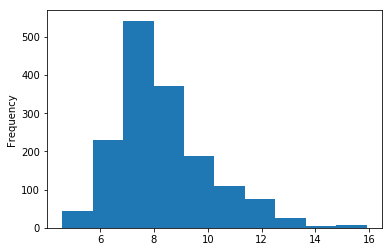

In [12]:
df.fixed_acidity.plot('hist')
plt.show()

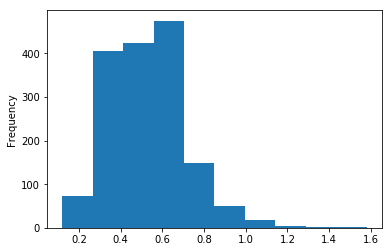

In [13]:
df.volatile_acidity.plot('hist')
plt.show()

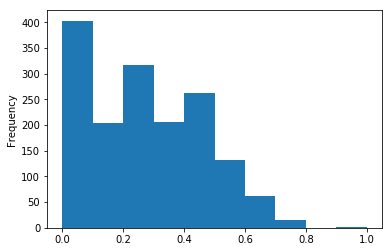

In [14]:
df.citric_acid.plot('hist')
plt.show()

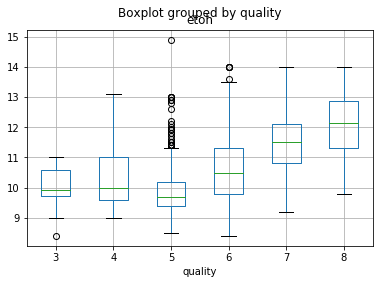

In [15]:
df.boxplot(column='etoh', by='quality')
plt.show()

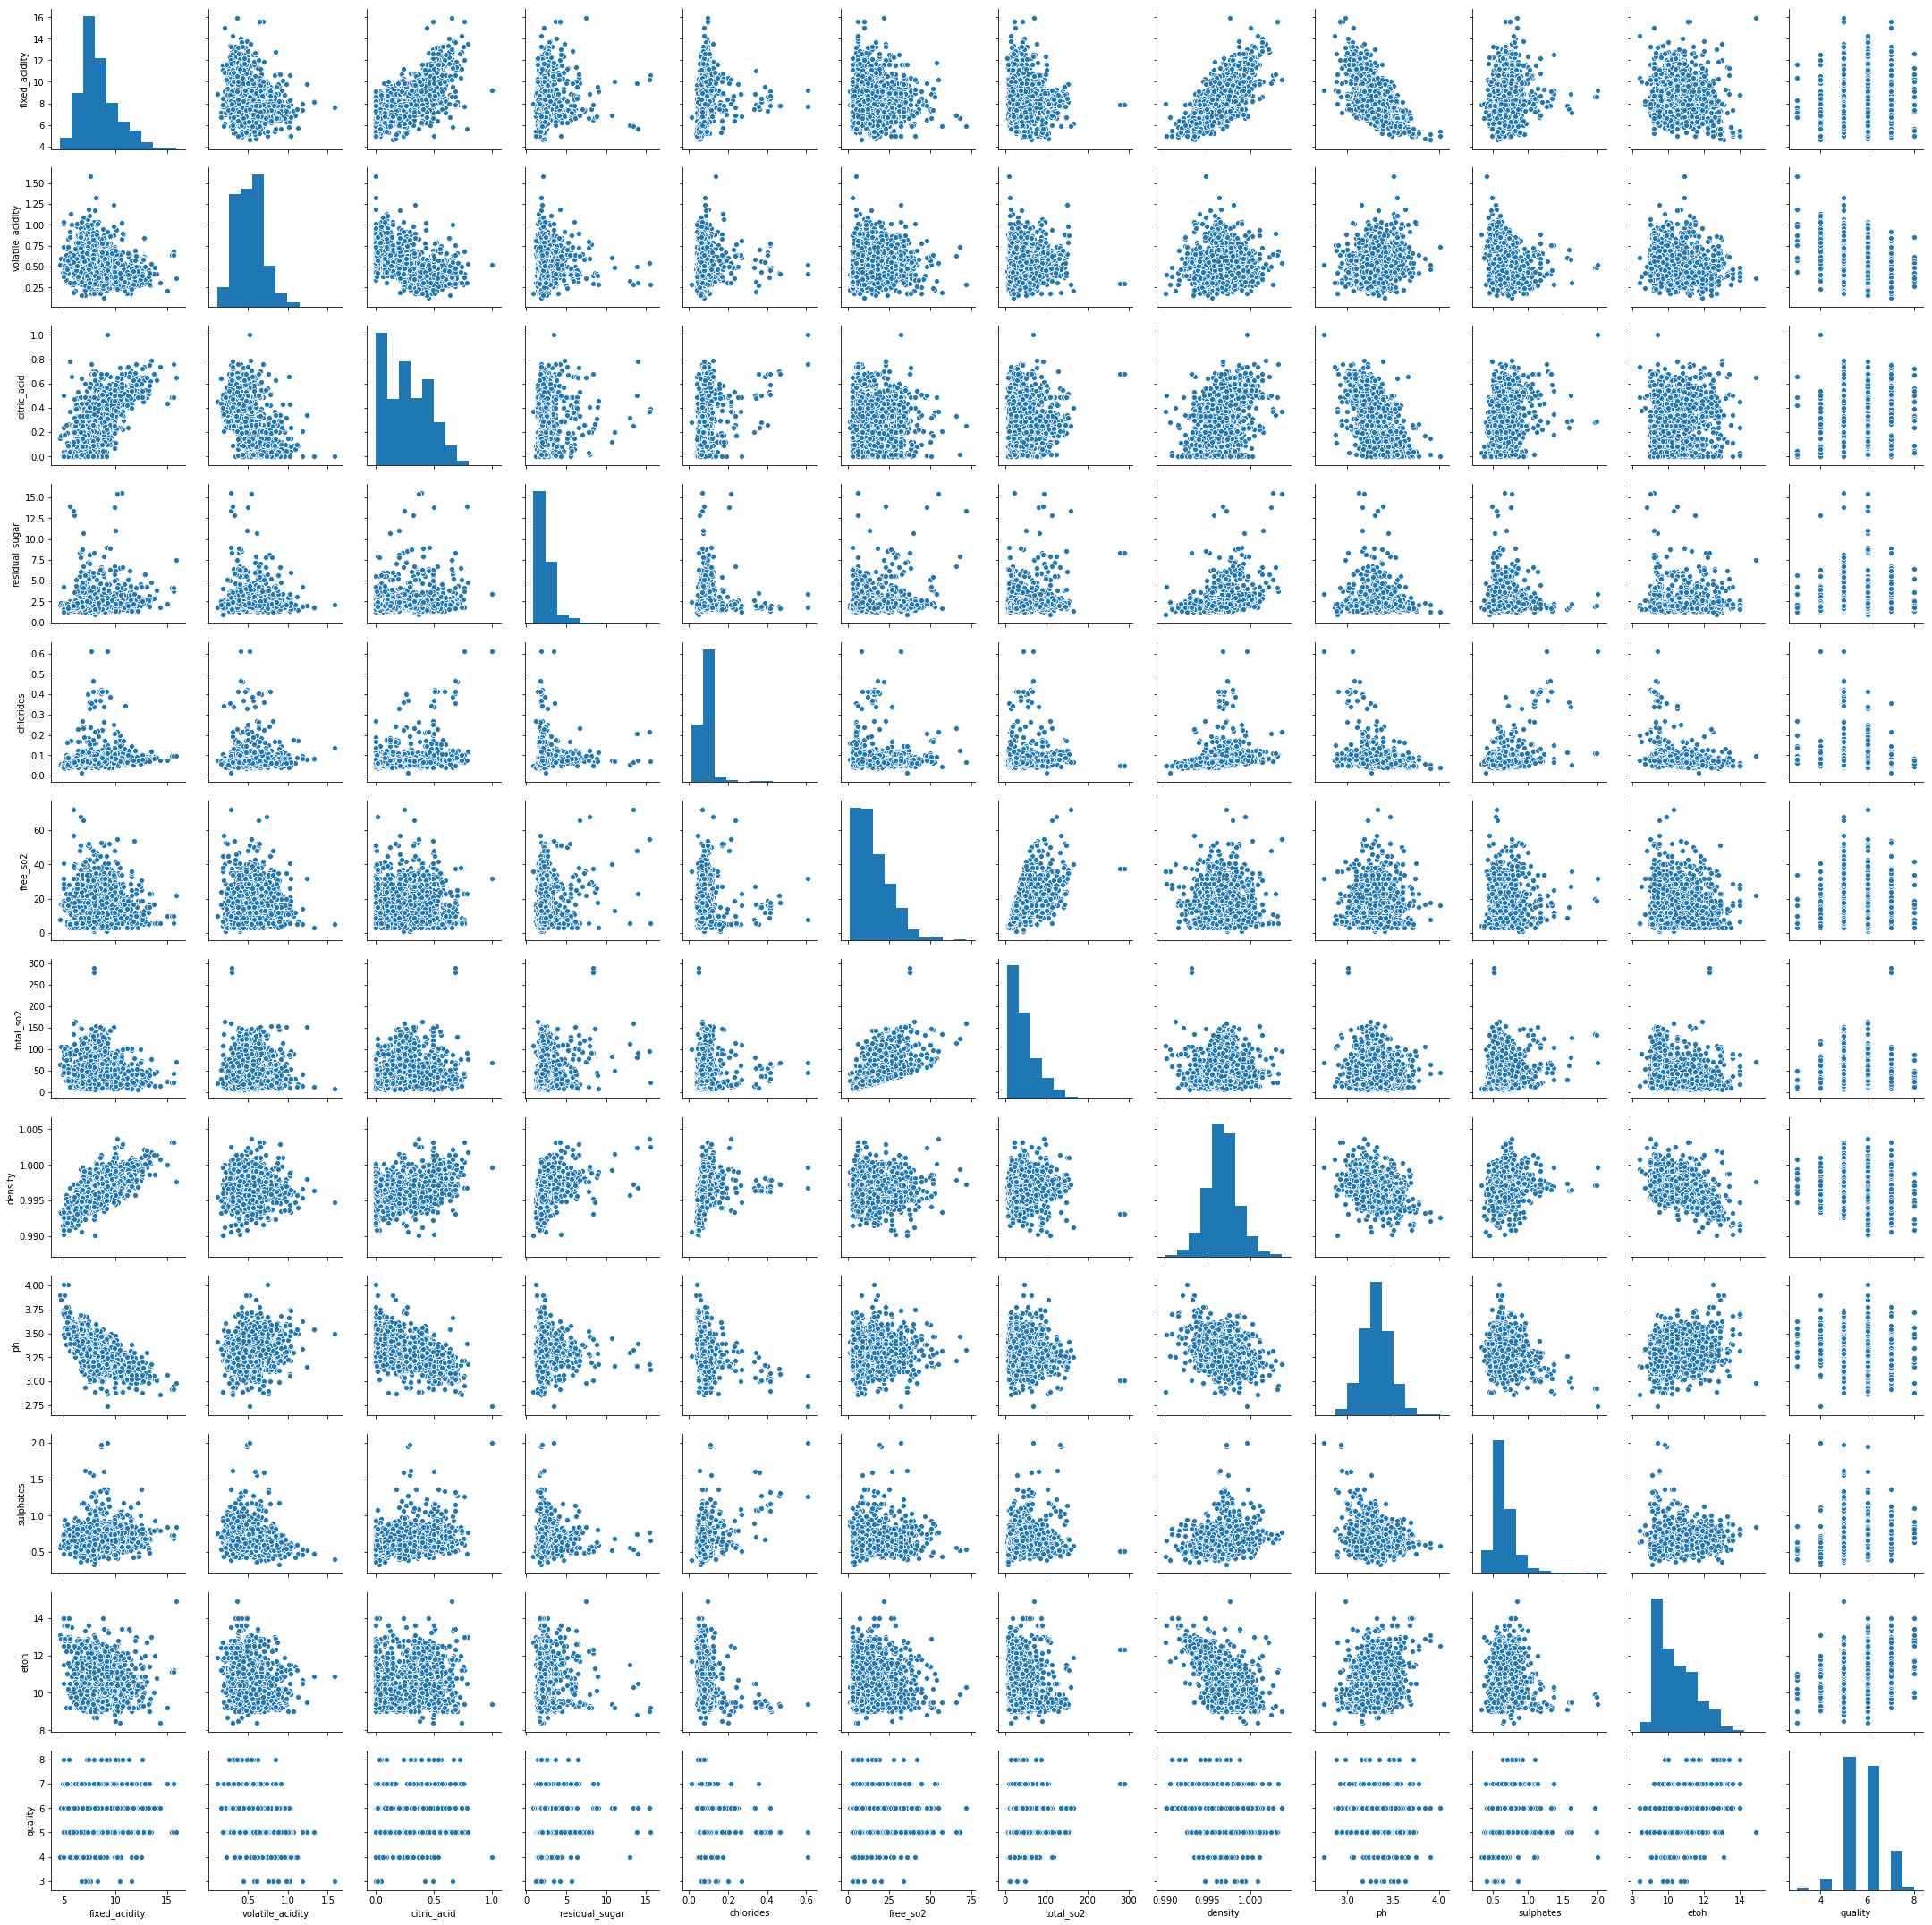

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
x = StandardScaler().fit_transform(df)
xt = x.T
cx = np.cov(xt)
print('Covariance Matrix:\n', cx)

Covariance Matrix:
 [[ 1.00062578 -0.25629118  0.67212377  0.11484855  0.09376383 -0.15389043
  -0.11325227  0.66846534 -0.68340559  0.18312019 -0.06170686  0.12412928]
 [-0.25629118  1.00062578 -0.55284143  0.00191908  0.06133613 -0.0105104
   0.07651786  0.02204002  0.23508431 -0.26115001 -0.20241462 -0.39080218]
 [ 0.67212377 -0.55284143  1.00062578  0.14366701  0.20395046 -0.06101629
   0.03555526  0.36517555 -0.54224326  0.31296577  0.10997202  0.22651417]
 [ 0.11484855  0.00191908  0.14366701  1.00062578  0.05564433  0.18716605
   0.20315493  0.3555057  -0.08570602  0.00553058  0.04210177  0.01374023]
 [ 0.09376383  0.06133613  0.20395046  0.05564433  1.00062578  0.00556563
   0.04743013  0.20075788 -0.26519198  0.37149281 -0.22127893 -0.12898723]
 [-0.15389043 -0.0105104  -0.06101629  0.18716605  0.00556563  1.00062578
   0.66808426 -0.02195956  0.07042154  0.0516899  -0.06945179 -0.05068776]
 [-0.11325227  0.07651786  0.03555526  0.20315493  0.04743013  0.66808426
   1.00062578

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


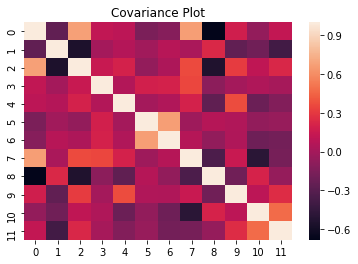

In [18]:
sns.heatmap(cx)
plt.title('Covariance Plot')
plt.show()

Based on the heatmap of the covariance, there are some correlations that might be important to wine quality. 

As for generating features, I'm not sure where combining values of chemical content would make sense. You could combine features such as acidity with ethanol together to see if that flavor profile would change the quality of the wine.
    examples:
    fixed_acidity * etoh
    residual_sugar * etoh
    residual_sugar * fixed_acidity
    residual_sugar * fixed_acidity * etoh

The best features to select would be volatile acidity, density, and ethanol content for their correlations to quality.

Filtering might be based on removing some of the outliers in the dataset.